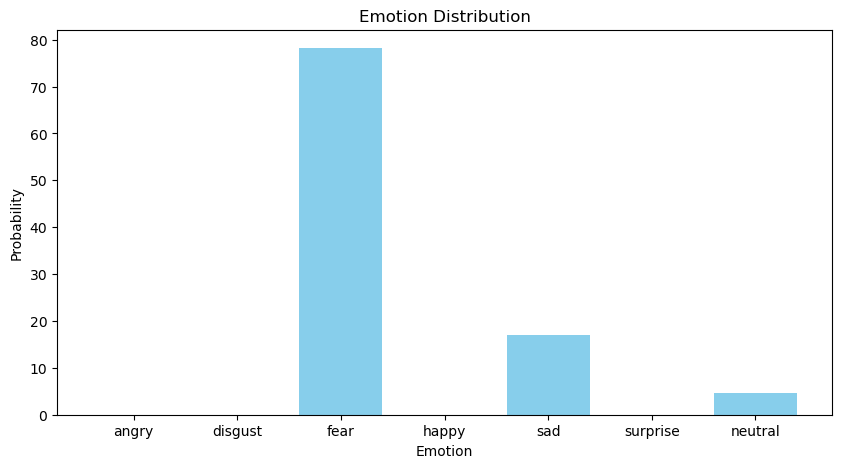

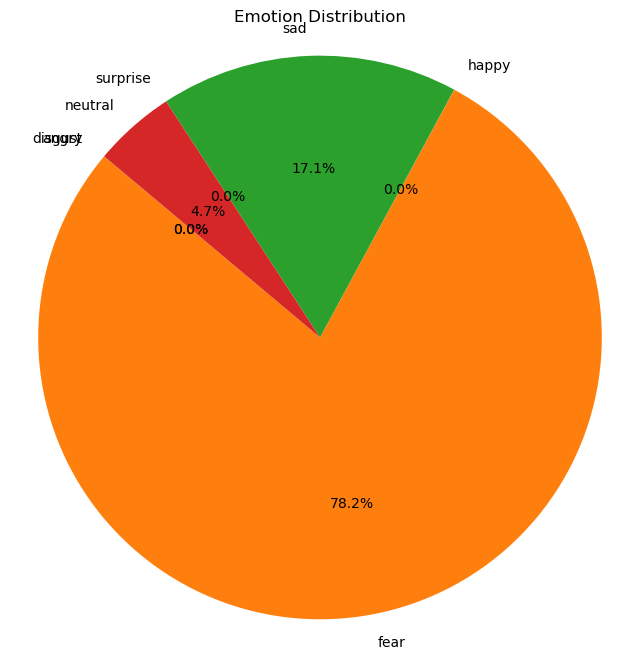

In [1]:
import cv2
import requests
import tkinter as tk
from tkinter import messagebox
from deepface import DeepFace
import matplotlib.pyplot as plt

root = tk.Tk()
root.title("Real-time Emotion Detection and Spotify Search")
root.geometry("800x600")

cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def search_spotify(emotion):
    try:
        url = "https://spotify81.p.rapidapi.com/search"
        querystring = {"q": f"{emotion}", "type": "multi", "offset": "0", "limit": "10", "numberOfTopResults": "5"}
        headers = {
            "X-RapidAPI-Key": "b7b9ebc756msh14229bf52a3b2b9p14684cjsna039506ea1f4",
            "X-RapidAPI-Host": "spotify81.p.rapidapi.com"
        }
        response = requests.get(url, headers=headers, params=querystring)
        tracks = response.json().get('tracks', [])
        if tracks:
            for track in tracks:
                song_name = track['data']['name']
                album_name = track['data']['albumOfTrack']['name']
                result_text.insert(tk.END, f'Song: {song_name} | Album: {album_name}\n')
        else:
            result_text.insert(tk.END, "No tracks found on Spotify for the given emotion.\n")
    except Exception as e:
        messagebox.showerror("Error", f"Error searching Spotify: {e}")
def detect_emotion():
    try:
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        for (x, y, w, h) in faces:
            face_img = frame[y:y+h, x:x+w]
            result = DeepFace.analyze(face_img, actions=['emotion'])
            
            emotion_graph = result[0]['emotion']
            plt.figure(figsize=(10, 5))
            plt.bar(emotion_graph.keys(), emotion_graph.values(), color='skyblue')
            plt.xlabel('Emotion')
            plt.ylabel('Probability')
            plt.title('Emotion Distribution')
            plt.show()
            
            labels = emotion_graph.keys()
            sizes = emotion_graph.values()
            plt.figure(figsize=(8, 8))
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
            plt.axis('equal')
            plt.title('Emotion Distribution')
            plt.show()
            emotion = max(result[0]['emotion'].items(), key=lambda x: x[1])[0]
            search_spotify(emotion)
            
        
    except Exception as e:
        messagebox.showerror("Error", f"Error detecting emotion: {e}")

def start_detection():
    start_button.config(state=tk.DISABLED)
    detect_emotion()

def stop_detection():
    start_button.config(state=tk.NORMAL)
    cap.release()
    cv2.destroyAllWindows()


start_button = tk.Button(root, text="Start Detection", command=start_detection)
start_button.pack(pady=5)
stop_button = tk.Button(root, text="Stop Detection", command=stop_detection)
stop_button.pack(pady=5)

result_text = tk.Text(root, height=10, width=80)
result_text.pack(pady=10)

root.mainloop()
